Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot
import pandas as pd

importa o csv para um pandas dataframe

In [30]:
#Download Datasets: Udemy: https://www.superdatascience.com/machine-learning/
dataset=pd.read_csv("./../0. DataSets/Data.csv")

Faz com que os displays (tanto do pandas como dos arrays tenham notacao decimal)

In [31]:
dataset.round()
pd.options.display.float_format = '{:,.0f}'.format
float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})

ver o dataset

In [32]:
dataset

,Country,Age,Salary,Purchased
0,France,44,"72,000",No
1,Spain,27,"48,000",Yes
2,Germany,30,"54,000",No
3,Spain,38,"61,000",No
4,Germany,40,nan,Yes
5,France,35,"58,000",Yes
6,Spain,nan,"52,000",No
7,France,48,"79,000",Yes
8,Germany,50,"83,000",No
9,France,37,"67,000",Yes


### separa as independent variables/features
#ou seja tira todas as linhas e todas as colunas EXCEPTO a ultima coluna do dataset

In [33]:
X=dataset.iloc[:,:-1]
X

,Country,Age,Salary
0,France,44,"72,000"
1,Spain,27,"48,000"
2,Germany,30,"54,000"
3,Spain,38,"61,000"
4,Germany,40,nan
5,France,35,"58,000"
6,Spain,nan,"52,000"
7,France,48,"79,000"
8,Germany,50,"83,000"
9,France,37,"67,000"


#converte o subset dataset numa matrix/array

In [34]:
X=X.values
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [35]:
#faz o mesmo mas para as dependent variables, ou seja tira a ultima coluna e transfor
y=dataset.iloc[:,-1].values
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

### limpa a data: usa este imputer que aplica aos missing_values (neste caso escolhi NaN) uma strategia (neste caso escolhi media da coluna)
#escolho os parametros do imputer
#fito o imputer as colunas onde quero limpar a data
#transformo as colunas a serem tratadas com este imputer

In [36]:
from sklearn.preprocessing import Imputer
imputer=Imputer(missing_values='NaN',strategy='mean',axis=0)
imputer=imputer.fit(X[:,1:3])
X[:,1:3]=imputer.transform(X[:,1:3])
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

### Transformar categorical variables em numeros
#agora vou transformar as variaveis categoricas (categorias = azul,verde ... ou Japao China) = coisas que nao consigo quantificar em numeros (tipo o One-Hot Encoding)
#Para cada categoria vou ter um vector com 1s onde estava essa categoria (por exemplo vector 0 representa France vou ter um 1 onde estava a Franca antes... cria vectores para cada categoria

In [37]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder_X=LabelEncoder()
X[:,0]=label_encoder_X.fit_transform(X[:,0])

#Este OneHotEconder parameter categorical_features meto la dentro o indice da coluna que quero OneHotEncode, neste caso e zero porque quero o Pais
onehotencoder=OneHotEncoder(categorical_features=[0])
X=onehotencoder.fit_transform(X).toarray()

label_encoder_y=LabelEncoder()
y=label_encoder_y.fit_transform(y)
X

array([[1.00, 0.00, 0.00, 44.00, 72000.00],
       [0.00, 0.00, 1.00, 27.00, 48000.00],
       [0.00, 1.00, 0.00, 30.00, 54000.00],
       [0.00, 0.00, 1.00, 38.00, 61000.00],
       [0.00, 1.00, 0.00, 40.00, 63777.78],
       [1.00, 0.00, 0.00, 35.00, 58000.00],
       [0.00, 0.00, 1.00, 38.78, 52000.00],
       [1.00, 0.00, 0.00, 48.00, 79000.00],
       [0.00, 1.00, 0.00, 50.00, 83000.00],
       [1.00, 0.00, 0.00, 37.00, 67000.00]])

In [38]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

### Split data set em train/test subsets
#dividir a data em test set e train set

In [39]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)
X_train

array([[0.00, 1.00, 0.00, 40.00, 63777.78],
       [1.00, 0.00, 0.00, 37.00, 67000.00],
       [0.00, 0.00, 1.00, 27.00, 48000.00],
       [0.00, 0.00, 1.00, 38.78, 52000.00],
       [1.00, 0.00, 0.00, 48.00, 79000.00],
       [0.00, 0.00, 1.00, 38.00, 61000.00],
       [1.00, 0.00, 0.00, 44.00, 72000.00],
       [1.00, 0.00, 0.00, 35.00, 58000.00]])

### Feature scaling
#como tenho diferentes variaveis com diferentes magnitudes preciso de as normalizar

In [40]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit(X_test)

# END OF PART1

## Part 2 - Linear Regression

In [41]:
# Data Preprocessing Template. Usando o que preciso e apagando o que nao preciso (feature scaling por exemplo)

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('/home/ubuntu/workspace/Machine Learning A-Z Template Folder/Part 2 - Regression/Section 4 - Simple Linear Regression/Salary_Data.csv')

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

# # Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

# # Feature Scaling
# """from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# X_train = sc_X.fit_transform(X_train)
# X_test = sc_X.transform(X_test)
# sc_y = StandardScaler()
# y_train = sc_y.fit_transform(y_train)"""


In [42]:
dataset.head()

,YearsExperience,Salary
0,1,"39,343"
1,1,"46,205"
2,2,"37,731"
3,2,"43,525"
4,2,"39,891"


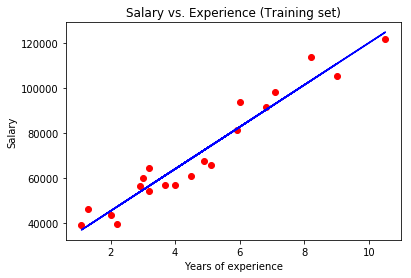

In [43]:
from sklearn.linear_model import LinearRegression

#cria um objecto regressao linear e faz um fit nesse objecto do nosso training set.
#no fundo cria uma recta que minimiza as distancias entre essa recta e os pontos do traning set 
#(x=idade e y=salarios)

regressor=LinearRegression()
regressor.fit(X_train,y_train)    #este regressor tem so a informacao dos parametros/coeficientes da recta

#predicting the test set results
#pegando na linha (regressao linear) que acabei de fazer, ve qual é o y correspondentes aos pontos x 
#do meu test_set
y_pred=regressor.predict(X_test)

#Visualising the Training set results
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title("Salary vs. Experience (Training set)")
plt.xlabel("Years of experience")
plt.ylabel('Salary')
plt.show()

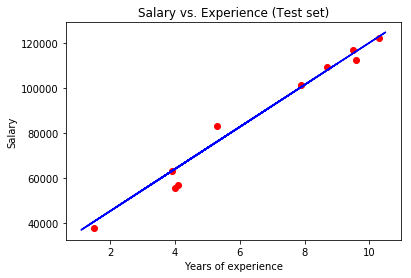

In [44]:
#faz o grafico dos pontos xy do dataset teste, para vermos de forma visual se estao muito longe da regressao
plt.scatter(X_test, y_test, color='red')

#aqui nao interessa que pontos passamos para o regressor porque a recta do modelo vai ser smpr igual
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title("Salary vs. Experience (Test set)")
plt.xlabel("Years of experience")
plt.ylabel('Salary')
plt.show()

# END OF PART 2
## MULTIPLE LINEAR REGRESSION

In [45]:
# Data Preprocessing Template. Usando o que preciso e apagando o que nao preciso (feature scaling por exemplo)

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('/home/ubuntu/workspace/Machine Learning A-Z Template Folder/Part 2 - Regression/Section 5 - Multiple Linear Regression/50_Startups.csv')

#dividir as variaveis independente das dependentes (y=aquilo que no fim eu quero prever, neste caso: profit)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,"165,349","136,898","471,784",New York,"192,262"
1,"162,598","151,378","443,899",California,"191,792"
2,"153,442","101,146","407,935",Florida,"191,050"
3,"144,372","118,672","383,200",New York,"182,902"
4,"142,107","91,392","366,168",Florida,"166,188"


In [46]:
# #como nas VI tenho palavras tenho que as tornar primeiro em numero, para isso vou dar um label a elas (por exemplo NY passa a ser 2, Florida passa a ser 1, California =0)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder_X=LabelEncoder()
X[:,3]=label_encoder_X.fit_transform(X[:,3])

#mostra so cinco linhas, so para ver
X[:5,:]

array([[165349.2, 136897.8, 471784.1, 2],
       [162597.7, 151377.59, 443898.53, 0],
       [153441.51, 101145.55, 407934.54, 1],
       [144372.41, 118671.85, 383199.62, 2],
       [142107.34, 91391.77, 366168.42, 1]], dtype=object)

In [47]:
#Este OneHotEconder parameter categorical_features meto la dentro o indice da coluna que quero OneHotEncode, neste caso e zero porque quero o Pais
#agora que escolhi a coluna onde tinha labels vou onehotencoding, ou seja vou ter uma coluna por label diferente e com 1 ou 0 se esse label corresponde a esta nova coluna ou nao.
#as colunas que apliquei o onehotencoder passam smpr para o inicio da tabela
onehotencoder=OneHotEncoder(categorical_features=[3])
X=onehotencoder.fit_transform(X).toarray()

#alterar a forma como os numeros sao mostrados, as casas decimais/tirar notacao cientifica etc
dataset.round()
pd.options.display.float_format = '{:,.0f}'.format
float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})

#mostra so cinco linhas, so para ver
X[:5,:]

array([[0.00, 0.00, 1.00, 165349.20, 136897.80, 471784.10],
       [1.00, 0.00, 0.00, 162597.70, 151377.59, 443898.53],
       [0.00, 1.00, 0.00, 153441.51, 101145.55, 407934.54],
       [0.00, 0.00, 1.00, 144372.41, 118671.85, 383199.62],
       [0.00, 1.00, 0.00, 142107.34, 91391.77, 366168.42]])

In [48]:
#Avoid the dummy variable trap = dps de fazer o onehotencoding temos que usar n-1 variaveis
X=X[:,1:]

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Feature Scaling not required on multiple linear regression: the library will take care of that for us

#Fitting multiple linear regression to the training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
#depois de ter feito a regressao, fazer a previsao. dps comparamos este y_pred com o y_test
y_pred=regressor.predict(X_test)
y_pred

array([103015.20, 132582.28, 132447.74, 71976.10, 178537.48, 116161.24,
       67851.69, 98791.73, 113969.44, 167921.07])

## Building a optimal model using Backward Elimination

In [50]:
#ou seja, inicialmente, vamos incluir todas as variaveis independentes e dps vamos remover uma a uma as que nao sao
#statistical relevant.
#para isso vamos comecar por incluir tb no modelo o coeficiente da constante

#adiciona uma coluna de 1s ao inicio da matrix X
import statsmodels.formula.api as sm
X=np.append(arr=np.ones((50,1)).astype(int), values=X ,axis=1)

#aplicar steps da backward propagations
#step 1 = define a significance level for a variable to stay in the model. Vou escolher SL=0.05

#step 2 = Fit the full model with all possible predictors/variables
X_opt=X[:,[0,1,2,3,4,5]]    #ou seja, o X tinha 6 colunas, vou escolher as 6 colunas neste passo 2.
regressor.OLS=sm.OLS(endog=y, exog=X_opt).fit()

#step 3 = Consider the predictor/variable with the highest P-value. If P > SL (because the lower the P value the more significant is that variable to the model), go to step 4, otherwise it's done
#chama a funcao summary ao regressor para ver estas estatisticas do modelo, por exemplo para ver o P value
regressor.OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sun, 22 Jul 2018   Prob (F-statistic):           1.34e-27
Time:                        12:47:54   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x2           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
#como a variavel x2 tem um p value de 0.990 quer dizer que nao e estatisticamente relevante para este modelo e posso aplicar o:
X_opt=X[:,[0,1,3,4,5]]

#repete agora o step 3 e 4 ate ter todas as variaveis com um p level < SL
regressor.OLS=sm.OLS(endog=y, exog=X_opt).fit()
regressor.OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sun, 22 Jul 2018   Prob (F-statistic):           8.49e-29
Time:                        12:47:54   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
x2             0.8060      0.046     17.606      0.000       0.714       0.898
x3            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x4             0.0270      0.017      1.592      0.118      -0.007       0.061
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
#como a variavel x1 tem um p value de 0.990 quer dizer que nao e estatisticamente relevante para este modelo e posso aplicar o:
X_opt=X[:,[0,3,4,5]]

#repete agora o step 3 e 4 ate ter todas as variaveis com um p level < SL
regressor.OLS=sm.OLS(endog=y, exog=X_opt).fit()
regressor.OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 22 Jul 2018   Prob (F-statistic):           4.53e-30
Time:                        12:47:55   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
X_opt=X[:,[0,3,5]]

#repete agora o step 3 e 4 ate ter todas as variaveis com um p level < SL
regressor.OLS=sm.OLS(endog=y, exog=X_opt).fit()
regressor.OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sun, 22 Jul 2018   Prob (F-statistic):           2.16e-31
Time:                        12:47:55   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
X_opt=X[:,[0,3]]

#repete agora o step 3 e 4 ate ter todas as variaveis com um p level < SL
regressor.OLS=sm.OLS(endog=y, exog=X_opt).fit()
regressor.OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sun, 22 Jul 2018   Prob (F-statistic):           3.50e-32
Time:                        12:47:55   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
#codigo dado para fazer esta backward elimination de forma automatica:
#nao sei como fazer as previsoes dps disto...

import statsmodels.formula.api as sm
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x
 
SL = 0.05
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
X_Modeled = backwardElimination(X_opt, SL)